In [1]:
import pandas as pd
import numpy as np
from apyori import apriori


In [2]:
df = pd.read_csv(r"C:\Users\ramni\Downloads\OnlineRetail (3).csv",encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
pd.DataFrame(df.dtypes.values, index=df.dtypes.index, columns=['Types'])

,Types
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [5]:
df_null = round(df.isnull().sum()/df.shape[0]*100,5)
pd.DataFrame(df_null.values, index=df_null.index, columns=['% Null'])

,% Null
InvoiceNo,0.00000
StockCode,0.00000
Description,0.26831
Quantity,0.00000
InvoiceDate,0.00000
UnitPrice,0.00000
CustomerID,24.92669
Country,0.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df = df.drop('CustomerID',axis =1)
df.shape

(541909, 7)

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,France


In [10]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [11]:
df = df.dropna()
df.shape

(540455, 7)

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [13]:
#df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.0+ MB


C:\Users\ramni\AppData\Local\Temp\ipykernel_14648\3145636752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)


In [14]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [15]:
df['Description'].nunique()

4223

In [16]:
df['Value']= df['Quantity']*df['UnitPrice']
df

C:\Users\ramni\AppData\Local\Temp\ipykernel_14648\387143266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value']= df['Quantity']*df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,France,16.60


In [17]:
a=df.groupby('Description')[['Quantity','Value']].sum()


In [18]:
a.sort_values('Value')

,Quantity,Value
Description,,
AMAZON FEE,-30,-221520.500
Manual,3165,-68671.640
Adjust bad debt,3,-11062.060
CRUK Commission,-16,-7933.430
Bank Charges,-13,-7175.639
...,...,...
JUMBO BAG RED RETROSPOT,47363,92356.030
PARTY BUNTING,18022,98302.980
WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.470


In [19]:
df.groupby('Country')[['Value']].sum().sort_values('Value')

,Value
Country,
Saudi Arabia,131.170
Bahrain,548.400
Czech Republic,707.720
RSA,1002.310
Brazil,1143.600
European Community,1291.750
Lithuania,1661.060
Lebanon,1693.880
USA,1730.920


In [20]:
data_neg = df[df['Value']<0]
data = df[df['Value']>0]

In [21]:
(data_neg['Value'].sum()/data['Value'].sum())*100

-8.615016279982713

In [22]:
data_neg.groupby('Country')[['Value']].sum().sort_values('Value')

,Value
Country,
United Kingdom,-837415.72
EIRE,-20177.14
France,-12311.21
Singapore,-12158.90
Germany,-7168.93
Spain,-6802.53
Hong Kong,-5574.76
Portugal,-4380.08
Japan,-2075.75


In [23]:
df_coun_prof = pd.DataFrame()
df_coun_prof["Total_Value"]=data.groupby('Country')[['Value']].sum().sort_values('Value')
df_coun_prof['Retured/Cancelled']=data_neg.groupby('Country')[['Value']].sum().sort_values('Value')
df_coun_prof['Retured/Cancelled']=df_coun_prof['Retured/Cancelled'].fillna(0)
df_coun_prof['Percentage_return']= (df_coun_prof['Retured/Cancelled']/df_coun_prof["Total_Value"]) *100
df_coun_prof.sort_values('Percentage_return')

,Total_Value,Retured/Cancelled,Percentage_return
Country,,,
Singapore,21279.290,-12158.90,-57.139594
USA,3580.390,-1849.47,-51.655546
Hong Kong,15691.800,-5574.76,-35.526581
Bahrain,754.140,-205.74,-27.281407
Czech Republic,826.740,-119.02,-14.396304
Portugal,33747.100,-4380.08,-12.979130
Spain,61577.110,-6802.53,-11.047173
Saudi Arabia,145.920,-14.75,-10.108279
United Kingdom,9025222.084,-837415.72,-9.278616


In [24]:
df_coun_prof['Net_Value']=df_coun_prof["Total_Value"]+df_coun_prof['Retured/Cancelled']
df_coun_prof.sort_values('Net_Value')

,Total_Value,Retured/Cancelled,Percentage_return,Net_Value
Country,,,,
Saudi Arabia,145.920,-14.75,-10.108279,131.170
Bahrain,754.140,-205.74,-27.281407,548.400
Czech Republic,826.740,-119.02,-14.396304,707.720
RSA,1002.310,0.00,0.000000,1002.310
Brazil,1143.600,0.00,0.000000,1143.600
European Community,1300.250,-8.50,-0.653720,1291.750
Lithuania,1661.060,0.00,0.000000,1661.060
Lebanon,1693.880,0.00,0.000000,1693.880
USA,3580.390,-1849.47,-51.655546,1730.920


In [25]:
df_coun_prof['Net_Value_percentage_country'] = (df_coun_prof['Net_Value'] / sum(df_coun_prof['Net_Value']))*100
df_coun_prof.sort_values('Net_Value_percentage_country', ascending = False)

,Total_Value,Retured/Cancelled,Percentage_return,Net_Value,Net_Value_percentage_country
Country,,,,,
United Kingdom,9025222.084,-837415.72,-9.278616,8187806.364,83.996903
Netherlands,285446.340,-784.80,-0.274938,284661.540,2.920280
EIRE,283453.960,-20177.14,-7.118313,263276.820,2.700899
Germany,228867.140,-7168.93,-3.132354,221698.210,2.274353
France,209715.110,-12311.21,-5.870445,197403.900,2.025123
Australia,138521.310,-1444.04,-1.042468,137077.270,1.406246
Switzerland,57089.900,-704.55,-1.234106,56385.350,0.578445
Spain,61577.110,-6802.53,-11.047173,54774.580,0.561920
Belgium,41196.340,-285.38,-0.692731,40910.960,0.419697


In [26]:
data.groupby('Country')[['Value']].sum().sort_values('Value')

,Value
Country,
Saudi Arabia,145.920
Bahrain,754.140
Czech Republic,826.740
RSA,1002.310
Brazil,1143.600
European Community,1300.250
Lithuania,1661.060
Lebanon,1693.880
United Arab Emirates,1902.280


In [27]:
data.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Value')

,Quantity,UnitPrice,Value
Description,,,
PADS TO MATCH ALL CUSHIONS,3,0.003,0.003
HEN HOUSE W CHICK IN NEST,1,0.420,0.420
SET 12 COLOURING PENCILS DOILEY,1,0.650,0.650
VINTAGE BLUE TINSEL REEL,2,0.420,0.840
PINK CRYSTAL GUITAR PHONE CHARM,1,0.850,0.850
...,...,...,...
PARTY BUNTING,18295,9885.030,99504.330
WHITE HANGING HEART T-LIGHT HOLDER,37891,7472.970,106292.770
"PAPER CRAFT , LITTLE BIRDIE",80995,2.080,168469.600


In [28]:
data.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Quantity')

,Quantity,UnitPrice,Value
Description,,,
TINY CRYSTAL BRACELET RED,1,2.48,2.48
SET 12 COLOURING PENCILS DOILEY,1,0.65,0.65
PINK CRYSTAL GUITAR PHONE CHARM,1,0.85,0.85
FILIGREE DIAMANTE CHAIN,1,12.48,12.48
PINK BERTIE MOBILE PHONE CHARM,1,3.36,3.36
...,...,...,...
WHITE HANGING HEART T-LIGHT HOLDER,37891,7472.97,106292.77
JUMBO BAG RED RETROSPOT,48474,5249.29,94340.05
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,172.20,13841.85


In [29]:
data.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('UnitPrice')

,Quantity,UnitPrice,Value
Description,,,
PADS TO MATCH ALL CUSHIONS,3,0.003,0.003
CAT WITH SUNGLASSES BLANK CARD,5,0.190,0.950
HAPPY BIRTHDAY CARD TEDDY/CAKE,5,0.190,0.950
POP ART PUSH DOWN RUBBER,98,0.240,11.760
HEAVENS SCENT FRAGRANCE OILS ASSTD,72,0.290,20.880
...,...,...,...
AMAZON FEE,2,13761.090,13761.090
REGENCY CAKESTAND 3 TIER,13879,28191.460,174484.740
POSTAGE,3150,34992.230,78101.880


In [30]:
data.groupby('Country')[['Description','Value']].max().sort_values('Value')

,Description,Value
Country,,
Saudi Arabia,PLASTERS IN TIN STRONGMAN,19.80
RSA,WOODEN CROQUET GARDEN SET,38.25
European Community,WHITE ROCKING HORSE HAND PAINTED,60.00
Unspecified,ZINC METAL HEART DECORATION,69.36
Czech Republic,WOODEN TREE CHRISTMAS SCANDINAVIAN,70.80
USA,WRAP ENGLISH ROSE,81.36
Poland,ZINC WILLIE WINKIE CANDLE STICK,120.00
Lithuania,SILVER MUG BONE CHINA TREE OF LIFE,122.40
United Arab Emirates,WRAP PAISLEY PARK,153.00


In [31]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,France,16.60


In [32]:
d = df.groupby('InvoiceNo')[['InvoiceNo','Description']].max()
d

,InvoiceNo,Description
InvoiceNo,,
536365,536365,WHITE METAL LANTERN
536366,536366,HAND WARMER UNION JACK
536367,536367,RECIPE BOX WITH METAL HEART
536368,536368,YELLOW COAT RACK PARIS FASHION
536369,536369,BATH BUILDING BLOCK WORD
...,...,...
C581484,C581484,"PAPER CRAFT , LITTLE BIRDIE"
C581490,C581490,ZINC T-LIGHT HOLDER STARS SMALL
C581499,C581499,Manual


In [33]:
invoice_list =list(df['InvoiceNo'].unique())
invoice_list


['536365',
 '536366',
 '536367',
 '536368',
 '536369',
 '536370',
 '536371',
 '536372',
 '536373',
 '536374',
 '536375',
 '536376',
 '536377',
 '536378',
 '536380',
 '536381',
 'C536379',
 '536382',
 'C536383',
 '536384',
 '536385',
 '536386',
 '536387',
 '536388',
 '536389',
 '536390',
 'C536391',
 '536392',
 '536393',
 '536394',
 '536395',
 '536396',
 '536397',
 '536398',
 '536399',
 '536400',
 '536401',
 '536402',
 '536403',
 '536404',
 '536405',
 '536406',
 '536407',
 '536408',
 '536409',
 '536412',
 '536415',
 '536416',
 '536420',
 '536423',
 '536425',
 '536437',
 '536446',
 '536460',
 '536463',
 '536464',
 '536466',
 '536477',
 '536488',
 '536500',
 '536502',
 '536508',
 'C536506',
 '536514',
 '536520',
 '536521',
 '536522',
 '536523',
 '536524',
 '536525',
 '536526',
 '536527',
 '536528',
 '536529',
 '536530',
 '536531',
 '536532',
 '536533',
 '536534',
 '536535',
 '536536',
 '536537',
 '536538',
 '536539',
 '536540',
 '536541',
 '536542',
 'C536543',
 '536544',
 'C536548',
 '53

<AxesSubplot: xlabel='InvoiceDate'>

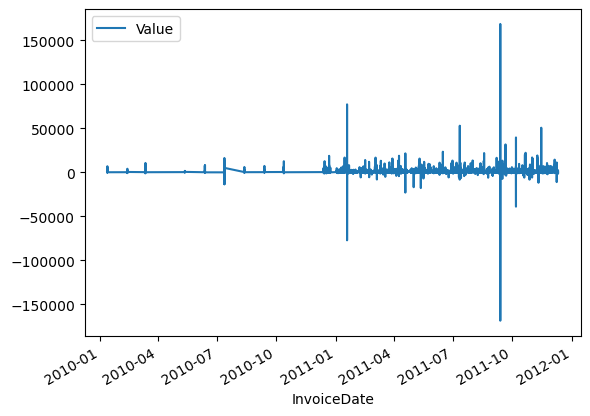

In [34]:
df.groupby('InvoiceDate')[['InvoiceDate','Value']].sum().plot()

<AxesSubplot: xlabel='InvoiceDate'>

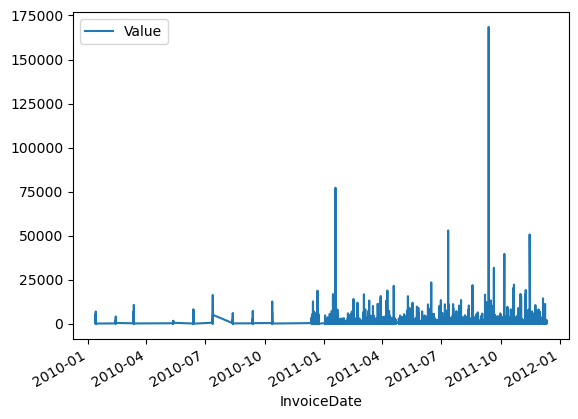

In [35]:
data.groupby('InvoiceDate')[['InvoiceDate','Value']].sum().plot()

In [36]:
grouped = df.groupby('InvoiceNo')['Description'].apply(list).reset_index()
grouped.drop(['InvoiceNo'],axis=1,inplace= True)
result = grouped.values.tolist()
result
List_flat=[]
for i in range(len(result)): #Traversing through the main list
    for j in range (len(result[i])): #Traversing through each sublist
        List_flat.append(result[i][j])


In [37]:
List_flat

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM ",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED ',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET'

In [38]:
model=apriori(List_flat, min_support=0.02, min_confidence=0.8, min_lift=1.0,min_length = 2)
model_ =list(model)

In [39]:
print(model_)

[RelationRecord(items=frozenset({'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'}), support=0.02634377812321034, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PINK REGENCY TEACUP AND SAUCER'}), items_add=frozenset({'GREEN REGENCY TEACUP AND SAUCER'}), confidence=0.8039950062421972, lift=18.594571355342246)]), RelationRecord(items=frozenset({'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}), support=0.022457661785159126, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'}), items_add=frozenset({'ROSES REGENCY TEACUP AND SAUCER '}), confidence=0.8524844720496895, lift=18.60699589618456), OrderedStatistic(items_base=frozenset({'PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}), items_add=frozenset({'GREEN REGENCY TEACUP AND SAUCER'}), confidence=0.8941368078175895, lift=20.679345699062246)])]


In [40]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,France,16.60


In [41]:
df.corr()

,Quantity,UnitPrice,Value
Quantity,1.000000,-0.001248,0.888164
UnitPrice,-0.001248,1.000000,-0.162036
Value,0.888164,-0.162036,1.000000


In [42]:
df_drop = df.copy()
df_clus = df_drop.drop(['StockCode','InvoiceDate','Value'], axis=1)

In [43]:
df_clus

,InvoiceNo,Description,Quantity,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom
...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2.10,France
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France


In [44]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df_clus['Description']= label_encoder.fit_transform(df_clus['Description'])
df_clus['Country']= label_encoder.fit_transform(df_clus['Country'])
df_clus['InvoiceNo']= label_encoder.fit_transform(df_clus['InvoiceNo'])
df_clus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  int32  
 1   Description  540455 non-null  int32  
 2   Quantity     540455 non-null  int64  
 3   UnitPrice    540455 non-null  float64
 4   Country      540455 non-null  int32  
dtypes: float64(1), int32(3), int64(1)
memory usage: 18.6 MB


In [45]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clus)
df_scaled 

array([[-1.71472319e+00,  1.56035636e+00, -1.65275532e-02,
        -2.14008557e-02,  2.80056377e-01],
       [-1.71472319e+00,  1.56734033e+00, -1.65275532e-02,
        -1.27311890e-02,  2.80056377e-01],
       [-1.71472319e+00, -1.06299438e+00, -7.35355254e-03,
        -1.93366494e-02,  2.80056377e-01],
       ...,
       [ 1.57108849e+00, -1.20616560e+00, -2.57015539e-02,
        -4.88720489e-03, -3.41142281e+00],
       [ 1.57108849e+00, -1.20703860e+00, -2.57015539e-02,
        -4.88720489e-03, -3.41142281e+00],
       [ 1.57108849e+00, -1.59464849e+00, -3.02885542e-02,
         3.36962053e-03, -3.41142281e+00]])

In [47]:
df_df1 = pd.DataFrame(df_scaled, columns = [df_clus.columns])
df_df1.head()

,InvoiceNo,Description,Quantity,UnitPrice,Country
0,-1.714723,1.560356,-0.016528,-0.021401,0.280056
1,-1.714723,1.567340,-0.016528,-0.012731,0.280056
2,-1.714723,-1.062994,-0.007354,-0.019337,0.280056
3,-1.714723,-0.192618,-0.016528,-0.012731,0.280056
4,-1.714723,0.681250,-0.016528,-0.012731,0.280056


In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

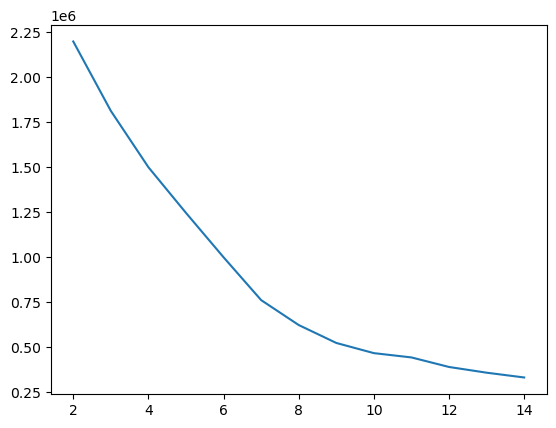

In [49]:
clusters=list(range(2,15))
ssd = []

df_df1.columns = [str(col) for col in df_df1.columns]

for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [50]:
ssd = [] #store the ssd data
range_n_clusters = list(range(2,20)) # number of clusters

#df_df1.columns = [str(col) for col in df_df1.columns]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_df1)
    ssd.append(kmeans.inertia_)
    ssd

In [51]:
ssd

[2196290.7603987562,
 1811263.648577173,
 1498804.9670169195,
 1274146.3181744365,
 1020661.298242872,
 761801.2922720433,
 623514.5676520634,
 524165.38188407675,
 467587.4512919319,
 424372.1027863709,
 401392.8320583017,
 358758.6993165016,
 334728.7578160596,
 310440.21975150343,
 282792.52565305383,
 259874.25071063283,
 250461.92982890335,
 228064.85385021148]

In [52]:
#no of clusters = 7

In [53]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_df1)

KMeans(n_clusters=7)

In [54]:
kmeans.labels_.shape

(540455,)

In [55]:
df.shape

(540455, 8)

In [56]:
df['Cluster'] = kmeans.labels_
df

C:\Users\ramni\AppData\Local\Temp\ipykernel_14648\1428546380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Value,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,20.34,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,France,10.20,2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,France,12.60,2
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,France,16.60,2
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,France,16.60,2


In [57]:
df.groupby('Cluster')['Value'].sum()

Cluster
0    3000468.731
1    3158161.401
2    1055016.310
3    2770252.742
4    -236151.250
5     245653.200
6    -245653.200
Name: Value, dtype: float64

In [58]:
for i in list(range(9)):
    print(i,df[df['Cluster']==i].shape)

0 (161234, 9)
1 (170667, 9)
2 (35104, 9)
3 (173415, 9)
4 (31, 9)
5 (2, 9)
6 (2, 9)
7 (0, 9)
8 (0, 9)


In [59]:
df_clus0= df[df['Cluster']==0]
df_clus1= df[df['Cluster']==1]
df_clus2= df[df['Cluster']==2]
df_clus3= df[df['Cluster']==3]
df_clus4= df[df['Cluster']==4]
df_clus5= df[df['Cluster']==5]
df_clus6= df[df['Cluster']==6]

In [60]:
df_clus0.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Value')

,Quantity,UnitPrice,Value
Description,,,
wrongly sold sets,-975,0.00,0.00
damages/showroom etc,-11,0.00,0.00
damages?,-40,0.00,0.00
did a credit and did not tick ret,1300,0.00,0.00
dotcom sold sets,-345,0.00,0.00
...,...,...,...
JUMBO BAG RED RETROSPOT,19554,2194.29,37213.20
PICNIC BASKET WICKER 60 PIECES,61,1299.00,39619.50
WHITE HANGING HEART T-LIGHT HOLDER,22445,4084.12,62292.62


In [61]:
df_clus1.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Value')

,Quantity,UnitPrice,Value
Description,,,
Adjust bad debt,2,-22124.120,-22124.120
AMAZON FEE,-6,20646.710,-20207.190
CRUK Commission,-16,7933.430,-7933.430
Bank Charges,-13,7505.641,-7175.639
Discount,-740,3218.580,-3225.770
...,...,...,...
DOORMAT KEEP CALM AND COME IN,5397,6266.980,37450.240
BLACK RECORD COVER FRAME,11365,1562.560,39639.720
CHILLI LIGHTS,10101,4541.830,53121.660


In [62]:
df_clus2.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Value')

,Quantity,UnitPrice,Value
Description,,,
Manual,-18,47249.38,-601.28
Discount,-2,460.84,-460.84
PINK METAL CHICKEN HEART,-24,4.47,-35.76
SET OF 3 BABUSHKA STACKING TINS,-6,8.50,-25.50
WOODEN BOX ADVENT CALENDAR,-2,8.95,-17.90
...,...,...,...
SPACEBOY LUNCH BOX,3596,294.15,6493.80
ROUND SNACK BOXES SET OF4 WOODLAND,3119,740.75,8817.05
RABBIT NIGHT LIGHT,10394,267.42,18760.99


In [63]:
df_clus3.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Value')

,Quantity,UnitPrice,Value
Description,,,
Manual,2565,97001.08,-46784.05
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150,4.99,-6591.42
FELTCRAFT DOLL MOLLY,-1425,48.66,-3430.71
SAMPLES,-60,3145.49,-3079.39
Discount,-452,1901.89,-2009.61
...,...,...,...
POPCORN HOLDER,33254,733.19,31460.14
WHITE HANGING HEART T-LIGHT HOLDER,11408,3300.35,33401.05
REGENCY CAKESTAND 3 TIER,3354,12078.06,43764.30


In [64]:
df_clus4.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Value')

,Quantity,UnitPrice,Value
Description,,,
AMAZON FEE,-24,228395.97,-201313.31
Manual,-2,45900.00,-45900.00
POSTAGE,0,16285.50,0.00
Adjust bad debt,1,11062.06,11062.06


In [65]:
df_clus5.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Value')

,Quantity,UnitPrice,Value
Description,,,
MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,77183.6
"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,168469.6


In [66]:
df_clus6.groupby('Description')[['Quantity','UnitPrice','Value']].sum().sort_values('Value')

,Quantity,UnitPrice,Value
Description,,,
"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,-168469.6
MEDIUM CERAMIC TOP STORAGE JAR,-74215,1.04,-77183.6


In [67]:
df_clus0.groupby('Country')[['Description','Value']].max().sort_values('Value')

,Description,Value
Country,,
Malta,WHITE SQUARE TABLE CLOCK,17.70
Saudi Arabia,PLASTERS IN TIN STRONGMAN,19.80
Unspecified,WRAP VINTAGE PETALS DESIGN,45.00
Lithuania,SILVER MUG BONE CHINA TREE OF LIFE,59.40
United Arab Emirates,WAY OUT METAL SIGN,65.40
USA,VINTAGE RED TEATIME MUG,76.50
Poland,ZINC WILLIE WINKIE CANDLE STICK,120.00
Switzerland,YOU'RE CONFUSING ME METAL SIGN,244.80
Norway,ZINC WILLIE WINKIE CANDLE STICK,700.00


In [68]:
df_clus1.groupby('Country')[['Description','Value']].max().sort_values('Value')

,Description,Value
Country,,
Saudi Arabia,ASSORTED BOTTLE TOP MAGNETS,5.04
RSA,GUMBALL COAT RACK,38.25
Malta,DOORMAT MERRY CHRISTMAS RED,39.80
Lithuania,BLUE HARMONICA IN BOX,45.00
USA,GLASS JAR ENGLISH CONFECTIONERY,46.80
Poland,LARGE CHINESE STYLE SCISSOR,60.00
Unspecified,LUNCH BAG RED RETROSPOT,69.36
United Arab Emirates,JAM JAR WITH PINK LID,89.70
Portugal,LUNCH BAG VINTAGE LEAF DESIGN,102.00


In [69]:
df_clus2.groupby('Country')[['Description','Value']].max().sort_values('Value')

,Description,Value
Country,,
European Community,WHITE ROCKING HORSE HAND PAINTED,60.00
Czech Republic,WOODEN TREE CHRISTMAS SCANDINAVIAN,70.80
Lithuania,IVORY ENCHANTED FOREST PLACEMAT,122.40
Lebanon,WOODEN SKITTLES GARDEN SET,153.00
Malta,TRIPLE PHOTO FRAME CORNICE,160.00
Belgium,WRAP SUKI AND FRIENDS,165.00
Greece,ZINC METAL HEART DECORATION,175.20
Brazil,SPACEBOY LUNCH BOX,175.20
Bahrain,VANILLA SCENT CANDLE JEWELLED BOX,205.74


In [70]:
df_clus3.groupby('Country')[['Description','Value']].max().sort_values('Value')

,Description,Value
Country,,
Saudi Arabia,GLASS JAR DAISY FRESH COTTON WOOL,-14.75
RSA,WOODEN CROQUET GARDEN SET,29.90
Unspecified,ZINC METAL HEART DECORATION,69.36
USA,WRAP ENGLISH ROSE,81.36
Poland,ZINC WILLIE WINKIE CANDLE STICK,85.92
United Arab Emirates,WRAP PAISLEY PARK,153.00
Norway,ZINC T-LIGHT HOLDER STARS SMALL,320.00
Portugal,ZINC WIRE KITCHEN ORGANISER,339.02
Spain,ZINC METAL HEART DECORATION,360.00


In [71]:
df_clus4.groupby('Country')[['Description','Value']].max().sort_values('Value')

,Description,Value
Country,,
United Kingdom,POSTAGE,13541.33


In [72]:
df_clus5.groupby('Country')[['Description','Value']].max().sort_values('Value')

,Description,Value
Country,,
United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",168469.6


In [73]:
df_clus6.groupby('Country')[['Description','Value']].max().sort_values('Value')

,Description,Value
Country,,
United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",-77183.6
